In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

C:\Diwash\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("supply_chain_data.csv")

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [3]:
print(df.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [4]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [5]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
df.duplicated().sum()

0

(array([0, 1, 2]),
 [Text(0, 0, 'cosmetics'), Text(1, 0, 'haircare'), Text(2, 0, 'skincare')])

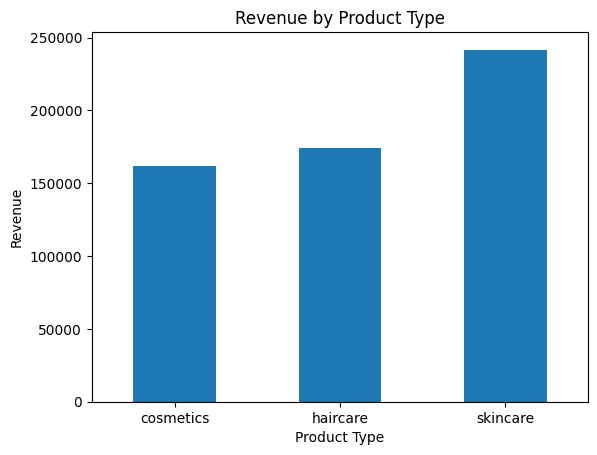

In [7]:
#Analyze Revenue by Product Category
revenue_by_product = df.groupby('Product type')['Revenue generated'].sum()
revenue_by_product.plot(kind='bar', title='Revenue by Product Type', xlabel='Product Type', ylabel='Revenue')
plt.xticks(rotation=0)


<Axes: title={'center': 'Top 10 SKUs by Sales Volume'}, xlabel='SKU', ylabel='Units Sold'>

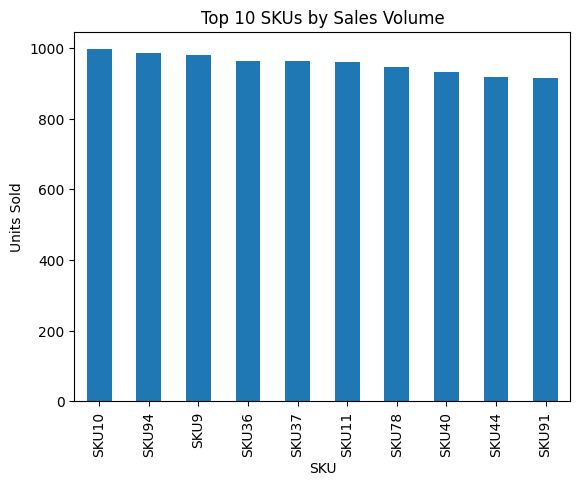

In [8]:
#Top 10 SKU sold quantity

top_skus = df.groupby('SKU')['Number of products sold'].sum().nlargest(10)
top_skus.plot(kind='bar', title='Top 10 SKUs by Sales Volume', xlabel='SKU', ylabel='Units Sold')


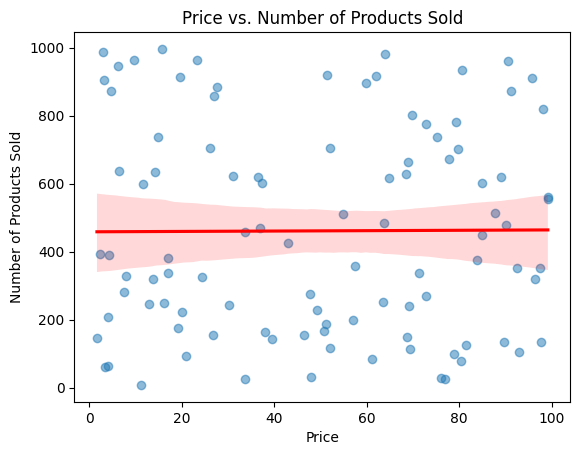

In [9]:
#Analyze to see a relation between Price and Number of Products Sold
sns.regplot(x=df['Price'], y=df['Number of products sold'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Price')
plt.ylabel('Number of Products Sold')
plt.title('Price vs. Number of Products Sold')
plt.show()

Although the number of products sold and Price do not seem to show any relationship, we can analyze further and see if it holds true for all the product category. 


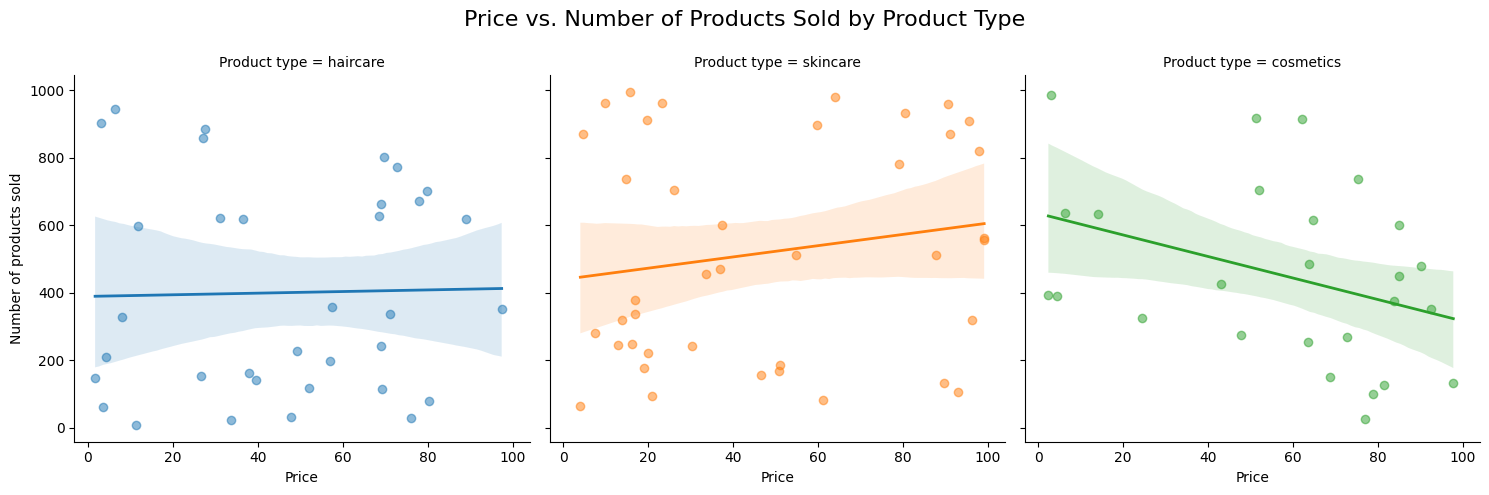

In [10]:
#Analyze to see a relation between Price and Number of Products Sold based on Category of Products

sns.lmplot(
    data=df, 
    x="Price", 
    y="Number of products sold", 
    hue="Product type",  
    col="Product type",  
    scatter_kws={'alpha': 0.5}, 
    line_kws={'lw': 2}
)


plt.subplots_adjust(top=0.85)
plt.suptitle("Price vs. Number of Products Sold by Product Type", fontsize=16)

plt.show()

While, the units sold and price does not hold a relationship for haircare, we have a positive relationsip and negative relatiosnhip for skincare and cosmetics product. This might suggest that consumer of cosmetics are most price sensetive. However, skincare products might have more giffen goods quality, contradiciting the normal basic demand-supply law of economics. 

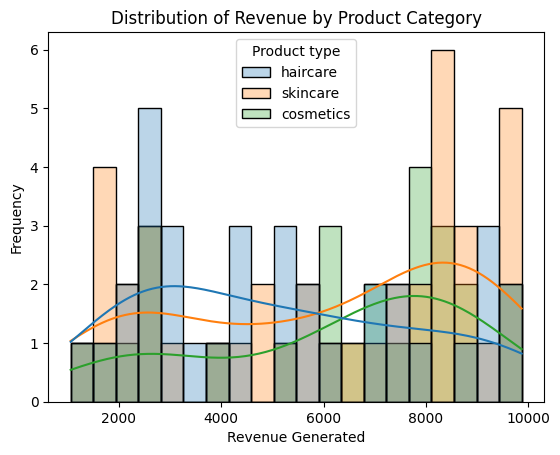

In [11]:
#Revenue Distrubition by Product Category

sns.histplot(
    data=df, 
    x="Revenue generated", 
    hue="Product type",
    kde=True,  
    bins=20,  
    alpha=0.3  
)
plt.xlabel("Revenue Generated")
plt.ylabel("Frequency")
plt.title("Distribution of Revenue by Product Category")
plt.show()

Analyzing revenue distribution based on category, skincare has a sort of bimodal distribution centered around 2000-4000 and 7500 - 9500. Whereas, haircare is centered around 2000-4000, left skew, and cosmetics is centered around 7000-9000, right skew. 

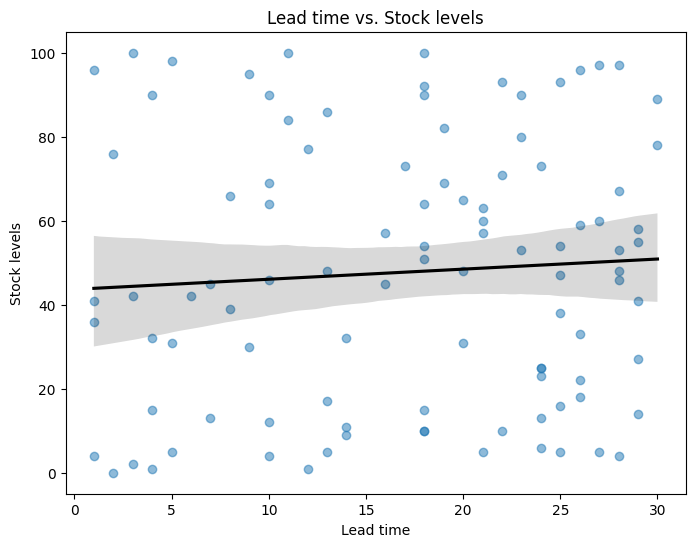

In [12]:
#Scatter Plot and Regression Line for Lead time and Stock levels

plt.figure(figsize=(8,6))
sns.regplot(x=df['Lead time'], y=df['Stock levels'], scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
plt.xlabel('Lead time')
plt.ylabel('Stock levels')
plt.title('Lead time vs. Stock levels')
plt.show()

The almost 0 correlation suggest that the companie's stock level is not affected by lead time. This might be because the company has strategies in place. 

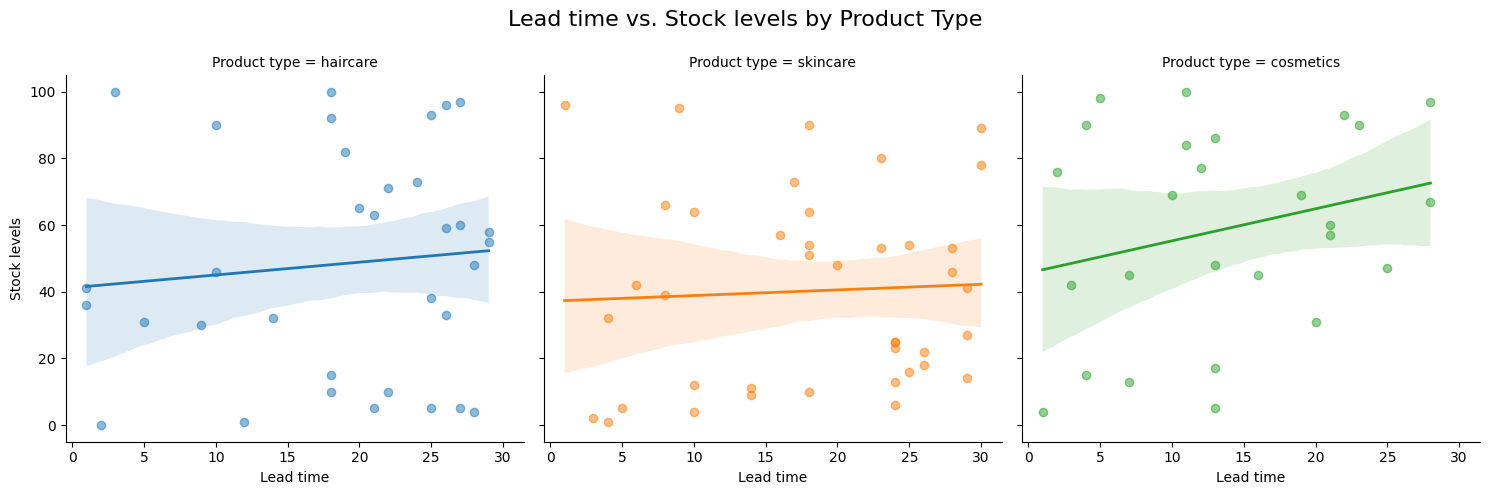

In [13]:
#scatter plot and regression line based on category
sns.lmplot(
    data=df, 
    x="Lead time", 
    y="Stock levels", 
    hue="Product type",  
    col="Product type",  
    scatter_kws={'alpha': 0.5}, 
    line_kws={'lw': 2}
)

plt.subplots_adjust(top=0.85)
plt.suptitle("Lead time vs. Stock levels by Product Type", fontsize=16)

plt.show()

While, the leadtime remains to have very less to no correlation for haircare and skincare, it does not hold true for cosmetics product. This suggest that the company is taking proactive steps to manage the risks associated with longer wait times for inventory replenishment. This approach helps avoid stockouts and ensures continuous product availability, though it may come with additional costs.

(array([0, 1, 2]),
 [Text(0, 0, 'Carrier A'), Text(1, 0, 'Carrier B'), Text(2, 0, 'Carrier C')])

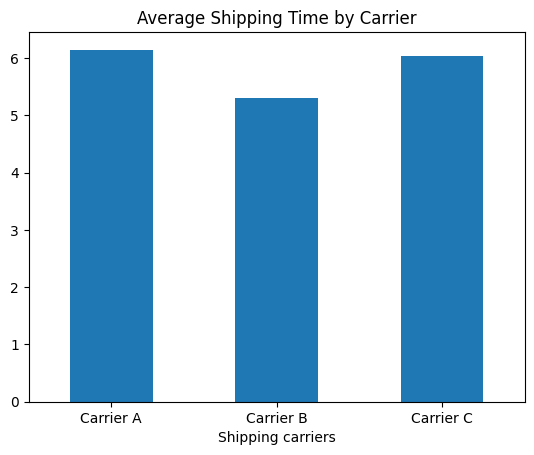

In [14]:
#Analyzing Shipping time by carrier
shipping_performance = df.groupby('Shipping carriers')['Shipping times'].mean()
shipping_performance.plot(kind='bar', title='Average Shipping Time by Carrier')
plt.xticks(rotation=0)


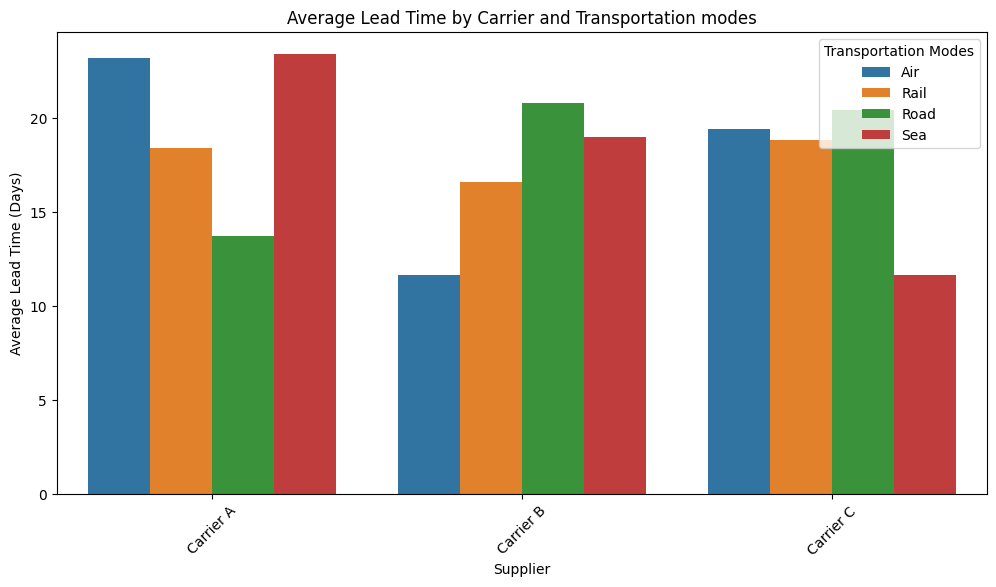

In [15]:
#barplot showing avg lead time for carriers and their transportation modes

supplier_category_lead_time = df.groupby(['Shipping carriers', 'Transportation modes'])['Lead time'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=supplier_category_lead_time, x='Shipping carriers', y='Lead time', hue='Transportation modes')
plt.title('Average Lead Time by Carrier and Transportation modes')
plt.xlabel('Supplier')
plt.ylabel('Average Lead Time (Days)')
plt.xticks(rotation=45)
plt.legend(title='Transportation Modes')
plt.show()

Carrier A has the highest average for air and sea mode of transport. The company can focus on choosing carrier based on the average mode of transportation. For example, the company can look into carrier C for sea mode of transportation and Carrier B for Air mode of Transportation

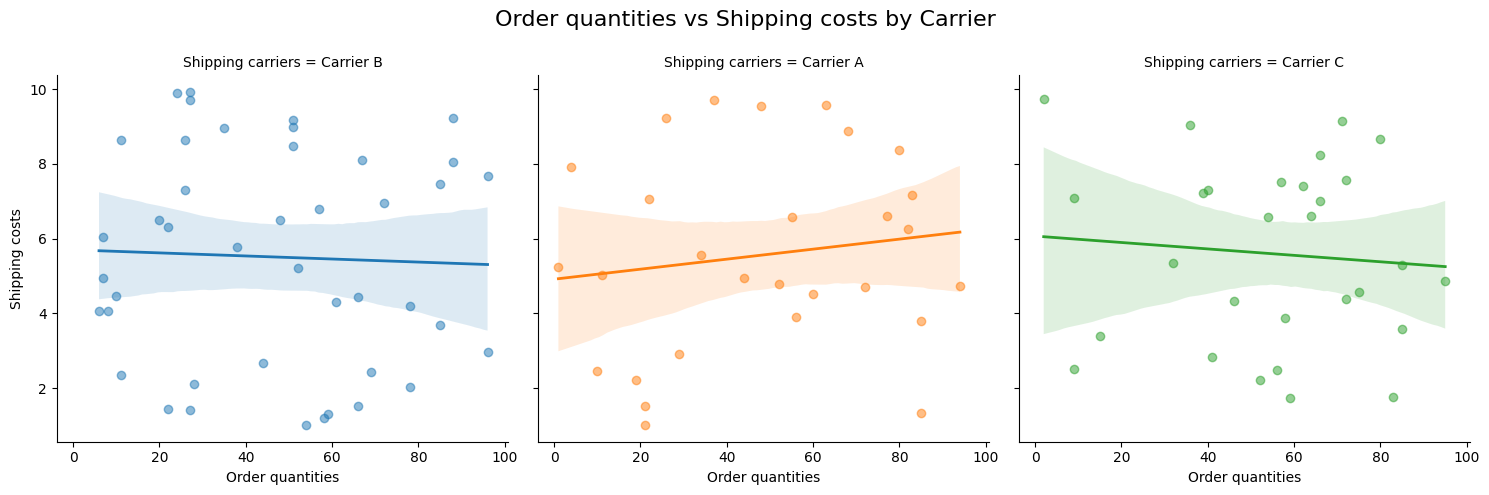

In [16]:
#Analyzing order quantities vs shipping costs based on carrier
sns.lmplot(
    data=df, 
    x="Order quantities", 
    y="Shipping costs", 
    hue="Shipping carriers",  
    col="Shipping carriers",  
    scatter_kws={'alpha': 0.5}, 
    line_kws={'lw': 2}
)
plt.subplots_adjust(top=0.85)
plt.suptitle("Order quantities vs Shipping costs by Carrier", fontsize=16)

plt.show()


Carrier C and B have good economics of scale as the ordeer quantity increases, the shipping cost decreases. Carrier A does not have good econmoics as they have positive correlation while also having a higher average shipping time, and the company might have to revisit their contract with the shipping company.

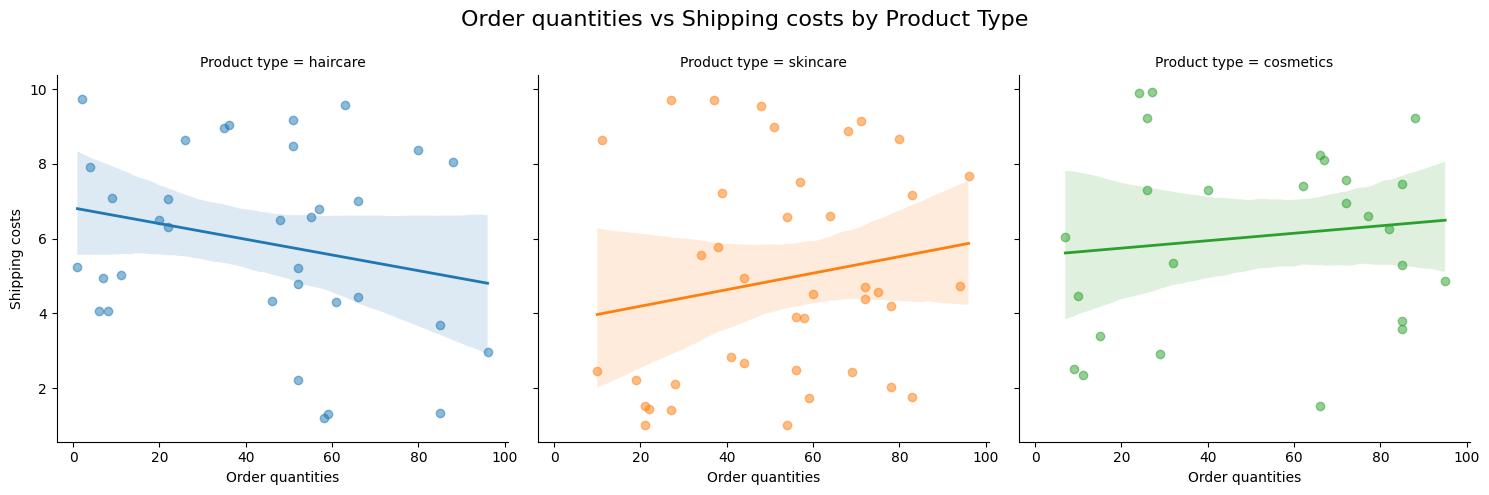

In [17]:
##Analyzing order quantities vs shipping costs based on product type

sns.lmplot(
    data=df, 
    x="Order quantities", 
    y="Shipping costs", 
    hue="Product type", 
    col="Product type",  
    scatter_kws={'alpha': 0.5}, 
    line_kws={'lw': 2}
)
plt.subplots_adjust(top=0.85)
plt.suptitle("Order quantities vs Shipping costs by Product Type", fontsize=16)

plt.show()


Haircare product type has good economics of scale as the ordeer quantity increases, the shipping cost decreases both skincare and cosmetics do not have good econmoics as they have positive correlation, and the company might have to revisit their contract with shipping company

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Supplier 1'),
  Text(1, 0, 'Supplier 2'),
  Text(2, 0, 'Supplier 3'),
  Text(3, 0, 'Supplier 4'),
  Text(4, 0, 'Supplier 5')])

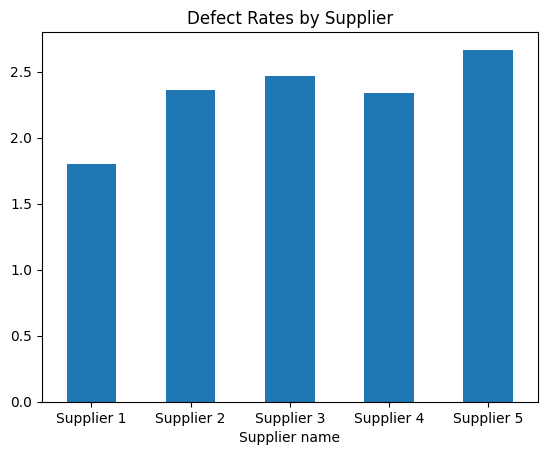

In [18]:
#Supplier Analysis
defect_rates = df.groupby('Supplier name')['Defect rates'].mean()
defect_rates.plot(kind='bar', title='Defect Rates by Supplier')
plt.xticks(rotation=0)


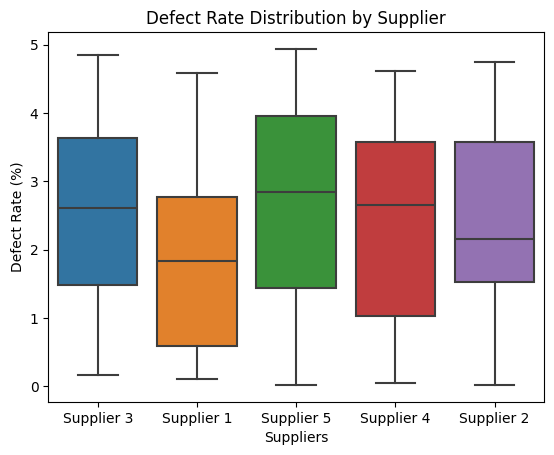

In [19]:
#Defect Rates box plot based on suppliers
sns.boxplot(data=df, x="Supplier name", y="Defect rates")
plt.xticks(rotation=0)
plt.title("Defect Rate Distribution by Supplier")
plt.xlabel("Suppliers")
plt.ylabel("Defect Rate (%)")
plt.show()

Altough the range of defect rate is similar among all the 5 suppliers, supplier 5 has the highest median rate and the lowest with supplier 1, a little more than half falling below 2%. 

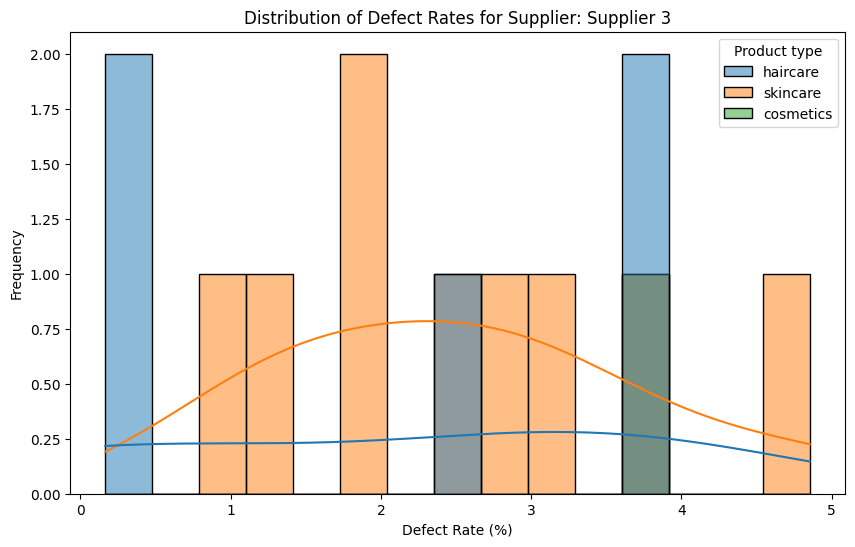

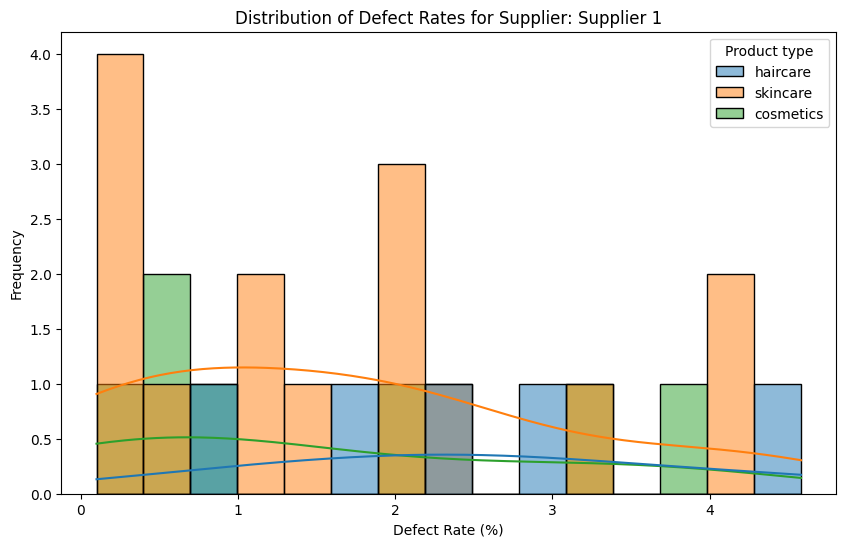

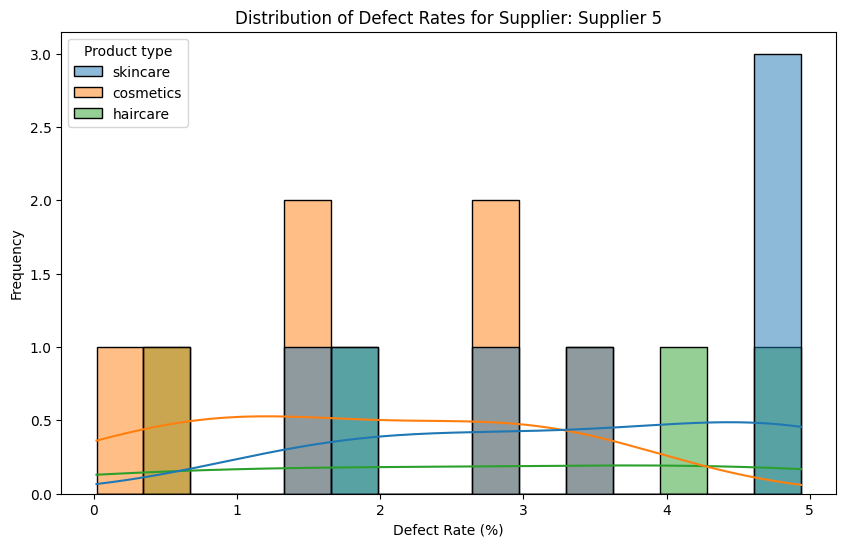

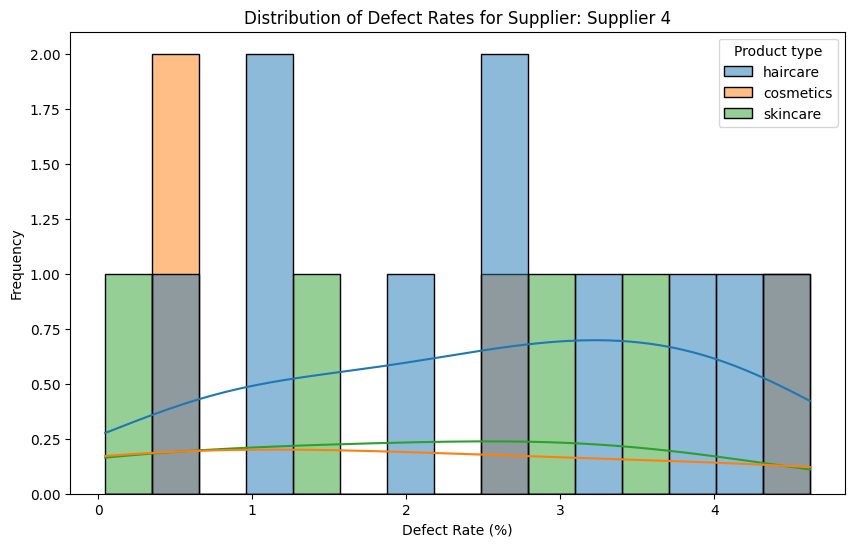

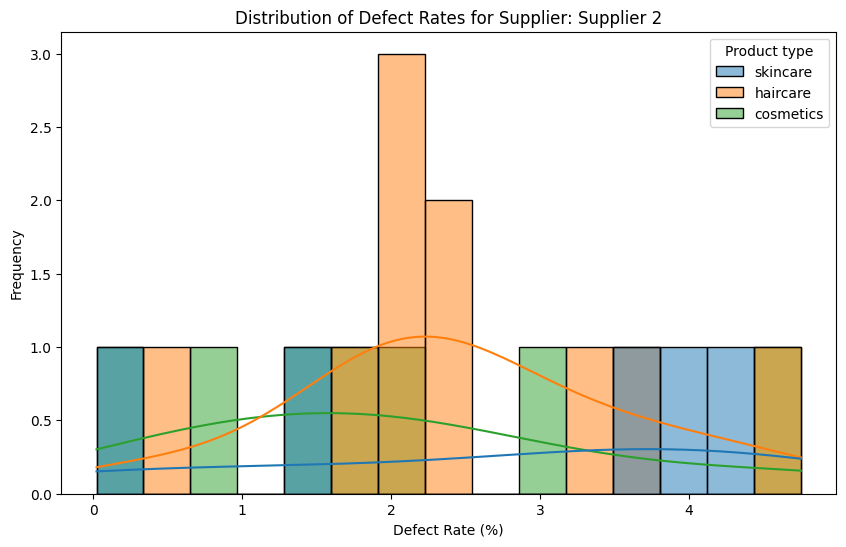

In [20]:
#Histogram for defect rates of suppliers based on categories

suppliers = df['Supplier name'].unique()

for supplier in suppliers:
    supplier_data = df[df['Supplier name'] == supplier]
    plt.figure(figsize=(10,6))
    sns.histplot(data=supplier_data, x="Defect rates", hue="Product type", kde=True, bins=15, alpha=0.5)
    plt.title(f"Distribution of Defect Rates for Supplier: {supplier}")
    plt.xlabel("Defect Rate (%)")
    plt.ylabel("Frequency")
    plt.show()


While the box plot presents a broader overview, a detailed examination of each category reveals that Supplier 5 exhibits the highest defect rate for skincare products. This suggests a potential quality control concern with this specific supplier, indicating that the company may need to request more stringent quality checks for skincare products sourced from this supplier to ensure product standards are maintained. 

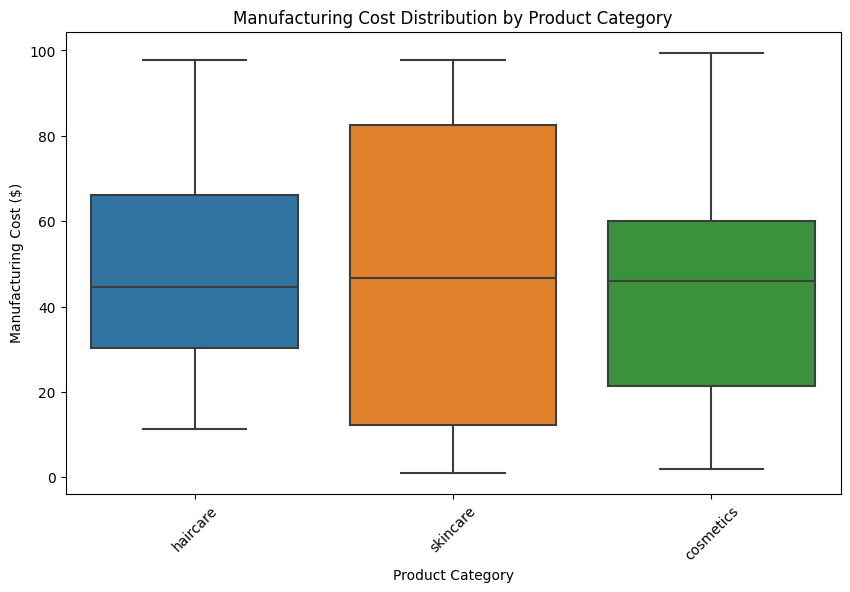

In [21]:
#Manufacturing Cost Box Plot by Product Category

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Product type", y="Manufacturing costs")
plt.xticks(rotation=45)
plt.title("Manufacturing Cost Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Manufacturing Cost ($)")
plt.show()

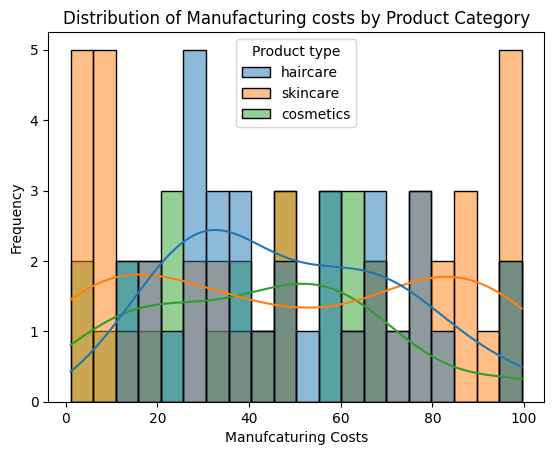

In [22]:
#Manufacturing Cost Histogram by Product Category
sns.histplot(data=df, x="Manufacturing costs", hue="Product type", kde=True, bins=20, alpha=0.5)
plt.title("Distribution of Manufacturing costs by Product Category")
plt.xlabel("Manufcaturing Costs")
plt.ylabel("Frequency")
plt.show()

The manufacturing cost distribution reveals that skincare products show significant variation, with some items having very low costs while others incur high manufacturing expenses. This suggests that the company should investigate the higher-cost skincare products to determine if the costs are justified or if inefficiencies can be addressed. Haircare products exhibit consistent but moderate manufacturing costs, indicating potential for cost optimization through process improvements or supplier negotiations. Cosmetics products have a moderate cost base, suggesting there may be opportunities to streamline production processes without compromising quality. To optimize overall manufacturing efficiency, the company should focus on evaluating high-cost skincare items, exploring cost-saving measures in haircare production, and identifying potential optimizations in cosmetics production.. 

<Axes: title={'center': 'Revenue by Location'}, xlabel='Location'>

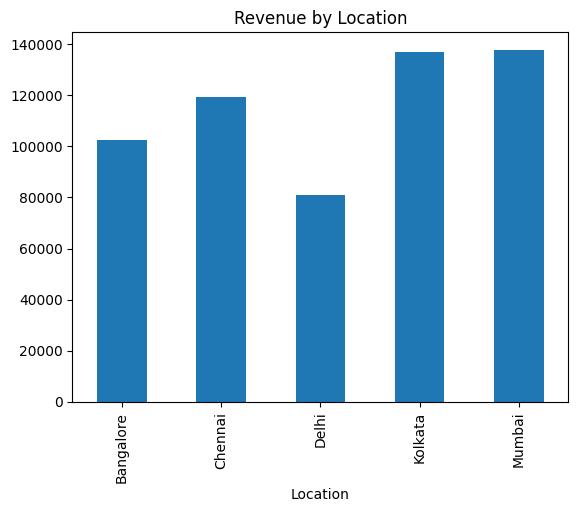

In [23]:
#Revenue Analysis by Geographic
df.groupby('Location')['Revenue generated'].sum().plot(kind='bar', title='Revenue by Location')


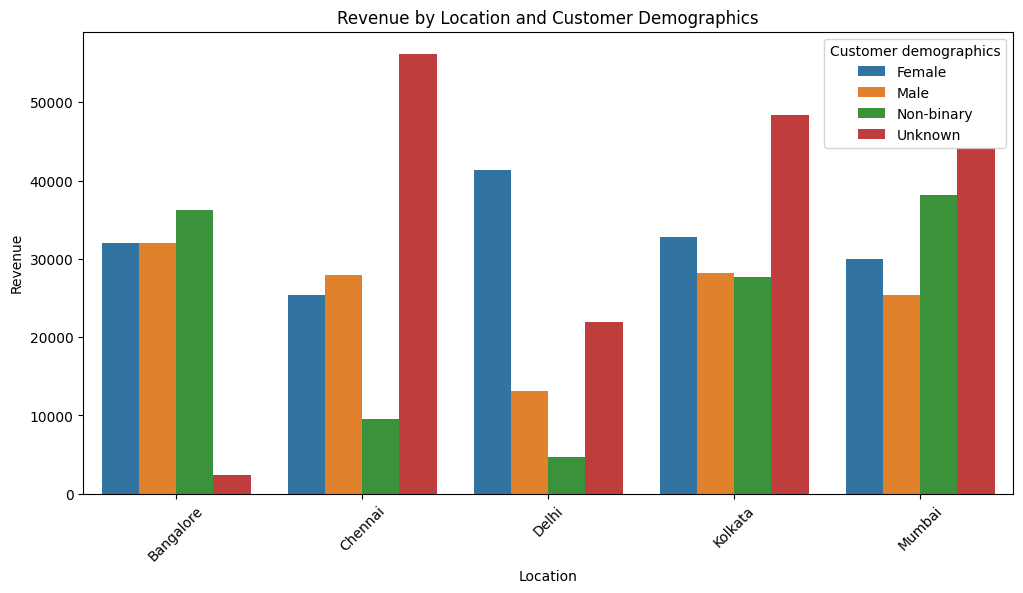

In [24]:
#Understanding Customer Demographics

customer_demographics = df.groupby(['Location', 'Customer demographics'])['Revenue generated'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_demographics, x='Location', y='Revenue generated', hue='Customer demographics')
plt.title('Revenue by Location and Customer Demographics')
plt.xlabel('Location')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Customer demographics')
plt.show()


Although Delhi had the least revenue overall, the city has the highest revenue from female and the company might want to focus more on female demographics in the city. Likewise, non-binary products are more popular in Mumbai and male being popular in Bangalore. 

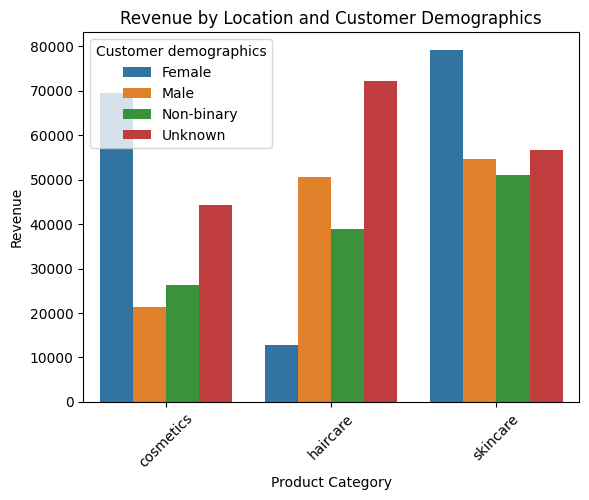

In [25]:
customer_demographics_product = df.groupby(['Product type', 'Customer demographics'])['Revenue generated'].sum().reset_index()
sns.barplot(data=customer_demographics_product, x='Product type', y='Revenue generated', hue='Customer demographics')
plt.title('Revenue by Location and Customer Demographics')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Customer demographics')
plt.show()


While cosmetics and skincare products are most popular among female, haircare products are more popular among male. The company would benift focusing their marketing campaign for cosmetics to female, skincare to all demographics and haircare to male. 